In [7]:
import pandas as pd
import numpy as np
import altair as alt
import datetime
from sklearn.linear_model import LinearRegression
alt.data_transformers.enable('json')
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
file = 'cpi_index.csv'
dat = pd.read_csv(file, index_col=0)
dat.index = pd.to_datetime(dat.index)
dat = dat.sort_index()

In [9]:
# or alternatively create a data frame of percentage changes
dat_pct_chg = dat.pct_change(periods=12)

In [10]:
#created seperate data frame
#dat['cpi_pct_chg'] = dat.cpi.pct_change(periods=12)
#dat['cpi_goods_pct_chg'] = dat.cpi_goods.pct_change(periods=12)
#dat['cpi_services_pct_chg'] = dat.cpi_services.pct_change(periods=12)

In [11]:
dat_pct_chg

,cpi,cpi_goods,cpi_services,retail_sales,avg_hourly_earnings,ECI,PCE_core
1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-09-01,0.036997,0.000221,0.056897,0.039962,0.045175,0.045603,0.035925
2023-10-01,0.032411,0.000948,0.054953,0.022047,0.042813,0.043142,0.033794
2023-11-01,0.031373,0.000460,0.054711,0.035772,0.042644,0.043142,0.031533
2023-12-01,0.033521,0.001741,0.053083,0.053110,0.043109,0.043142,0.029315


<Axes: >

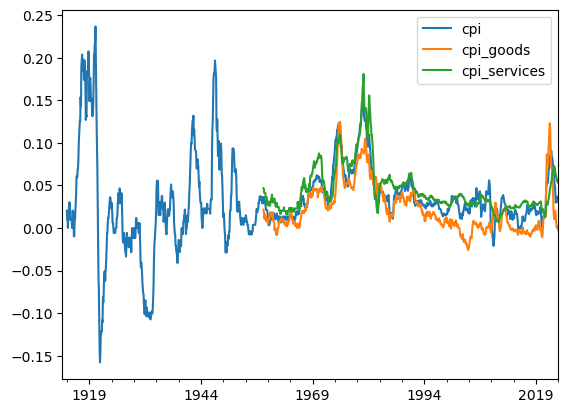

In [12]:
dat_pct_chg[["cpi", "cpi_goods", "cpi_services"]].plot()


<Axes: >

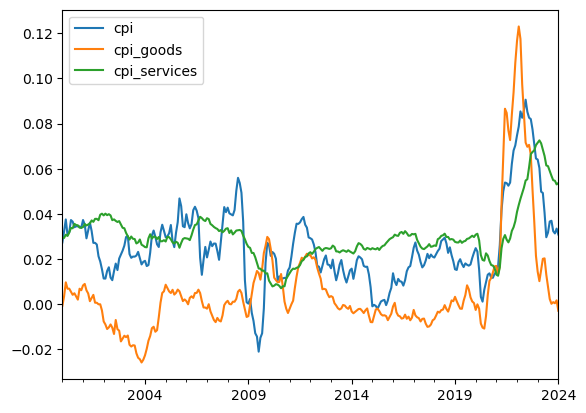

In [13]:
dat_pct_chg["2000":][["cpi", "cpi_goods", "cpi_services"]].plot()

In [14]:
cpi_base = dat['cpi']

In [15]:
cpi_base

1913-01-01      9.800
1913-02-01      9.800
1913-03-01      9.800
1913-04-01      9.800
1913-05-01      9.700
               ...   
2023-09-01    307.789
2023-10-01    307.671
2023-11-01    307.051
2023-12-01    306.746
2024-01-01    308.417
Name: cpi, Length: 1333, dtype: float64

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
model = seasonal_decompose(dat['cpi'].dropna(), model = 'multiplicitive',extrapolate_trend = 'freq')

Text(0.513, 0.95, 'CPI Index all urban not seasonally adjusted')

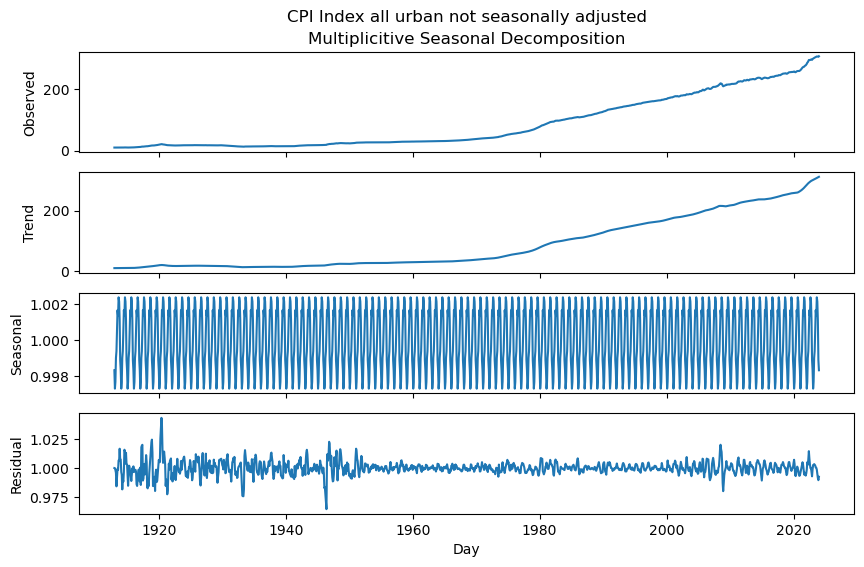

In [17]:
fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)


axes[0].set_title("Multiplicitive Seasonal Decomposition")
axes[0].plot(model.observed)
axes[0].set_ylabel("Observed")

axes[1].plot(model.trend)
axes[1].set_ylabel("Trend")

axes[2].plot(model.seasonal)
axes[2].set_ylabel("Seasonal")

axes[3].plot(model.resid)
axes[3].set_ylabel("Residual")

axes[3].set_xlabel("Day")
fig.suptitle("CPI Index all urban not seasonally adjusted", x=0.513, y=0.95)

In [18]:
model_df = pd.DataFrame({"trend" : model.trend, "resid" : model.resid,
 "raw" : np.log(dat.cpi), "seasonal": model.seasonal})

In [19]:
model_df["cum_resid"] = model_df.resid.cumsum()

In [20]:
model_df

,trend,resid,raw,seasonal,cum_resid
1913-01-01,9.817954,0.999836,2.282382,0.998335,0.999836
1913-02-01,9.829375,0.999695,2.282382,0.997315,1.999531
1913-03-01,9.840797,0.998163,2.282382,0.997687,2.997694
1913-04-01,9.852219,0.995682,2.282382,0.999014,3.993375
1913-05-01,9.863641,0.984000,2.272126,0.999400,4.977376
...,...,...,...,...,...
2023-09-01,307.528832,0.998466,5.729414,1.002383,1328.794721
2023-10-01,308.484192,0.995223,5.729031,1.002151,1329.789944
2023-11-01,309.439552,0.991194,5.727014,1.001097,1330.781138
2023-12-01,310.394912,0.989330,5.726020,0.998902,1331.770468


<Axes: >

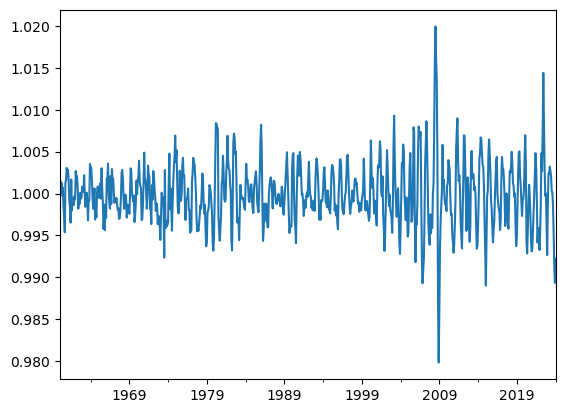

In [21]:
model.resid["1960":].plot()

In [22]:
dat

,cpi,cpi_goods,cpi_services,retail_sales,avg_hourly_earnings,ECI,PCE_core
1913-01-01,9.800,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,9.800,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,9.800,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,9.800,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,9.700,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-09-01,307.789,167.141,401.234,705304.0,34.01,NaN,119.842
2023-10-01,307.671,166.759,402.549,703528.0,34.10,162.0,120.010
2023-11-01,307.051,165.367,404.143,703336.0,34.23,NaN,120.088
2023-12-01,306.746,164.590,405.338,706180.0,34.36,NaN,120.294


In [23]:
cf_cycles, cf_trend = sm.tsa.filters.cffilter(np.log(dat["1975":][["cpi", "cpi_goods", "cpi_services"]]))

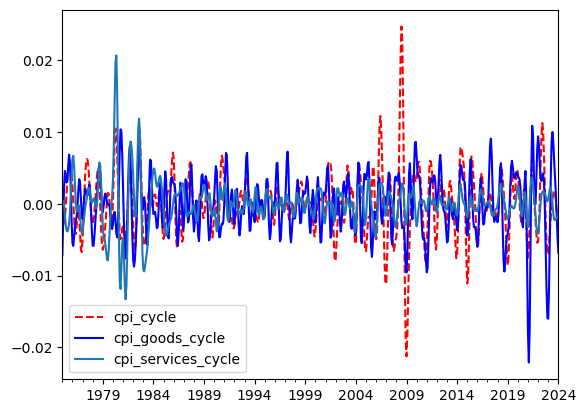

In [24]:
fig, ax = plt.subplots()
cf_cycles.plot(ax=ax, style=['r--', 'b-'])
plt.show()

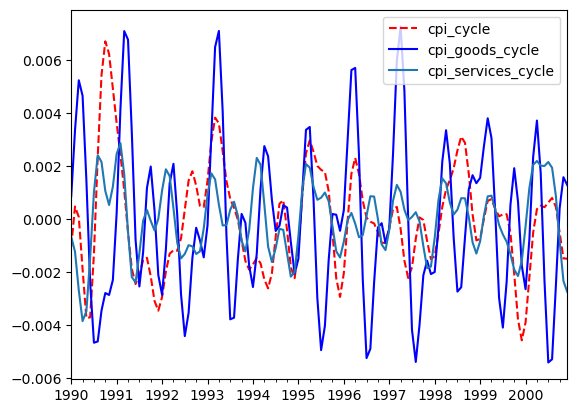

In [25]:
fig, ax = plt.subplots()
cf_cycles["1990":"2000"].plot(ax=ax, style=['r--', 'b-'])
plt.show()

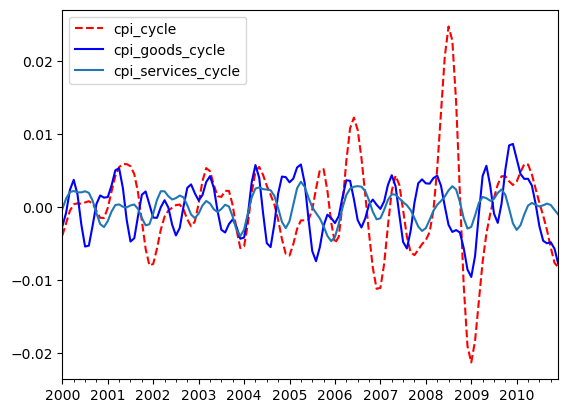

In [26]:
fig, ax = plt.subplots()
cf_cycles["2000":"2010"].plot(ax=ax, style=['r--', 'b-'])
plt.show()

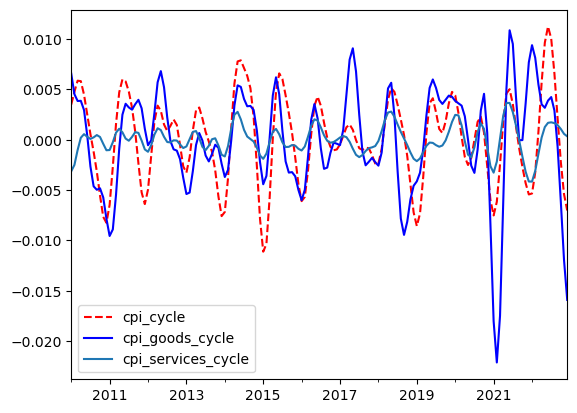

In [27]:
fig, ax = plt.subplots()
cf_cycles["2010":"2022"].plot(ax=ax, style=['r--', 'b-'])
plt.show()

In [28]:
cycle, trend = sm.tsa.filters.hpfilter(np.log(dat.cpi), 129600)


<Axes: >

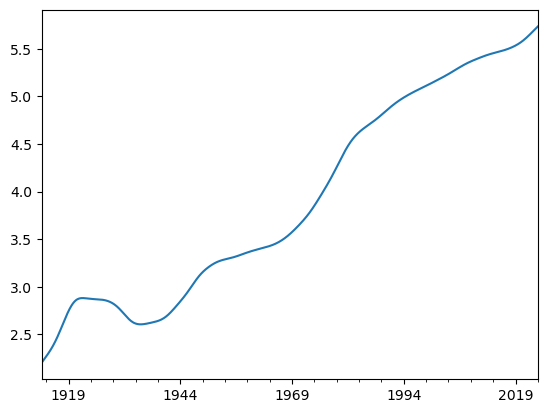

In [29]:
trend.plot()

In [30]:
cpi_decomp = pd.DataFrame({"cycle" : cycle , "trend": trend, "log_cpi" : np.log(dat.cpi)})

In [33]:
cpi_decomp[['log_cpi']]

,log_cpi
1913-01-01,2.282382
1913-02-01,2.282382
1913-03-01,2.282382
1913-04-01,2.282382
1913-05-01,2.272126
...,...
2023-09-01,5.729414
2023-10-01,5.729031
2023-11-01,5.727014
2023-12-01,5.726020


<Axes: >

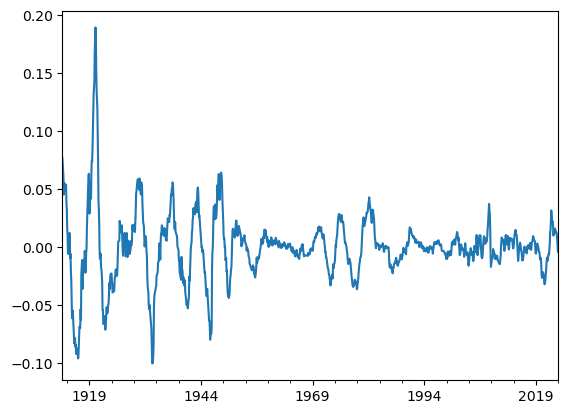

In [34]:
cpi_decomp['cycle'].plot()

<Axes: >

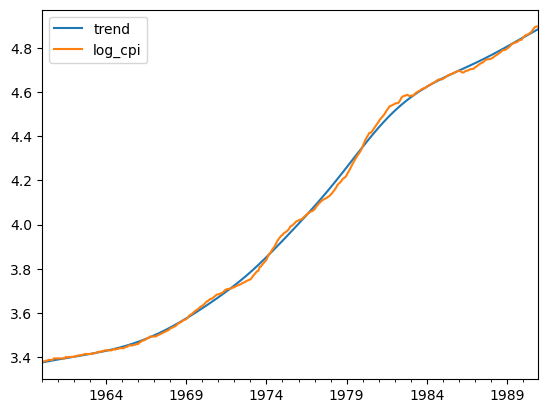

In [35]:
cpi_decomp["1960":"1990"][['trend', 'log_cpi']].plot()

In [36]:
cpi_decomp_pct_change  = np.exp(cpi_decomp[['trend', 'log_cpi']]).pct_change(12)


<Axes: >

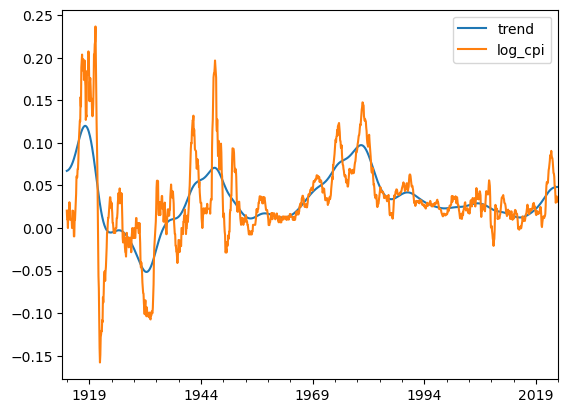

In [37]:
cpi_decomp_pct_change.plot()

<Axes: >

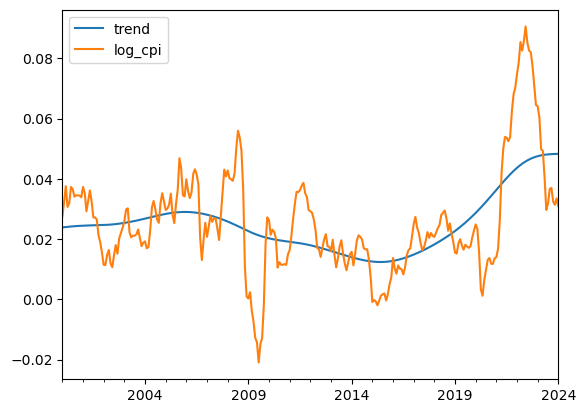

In [38]:
cpi_decomp_pct_change["2000":].plot()

<Axes: >

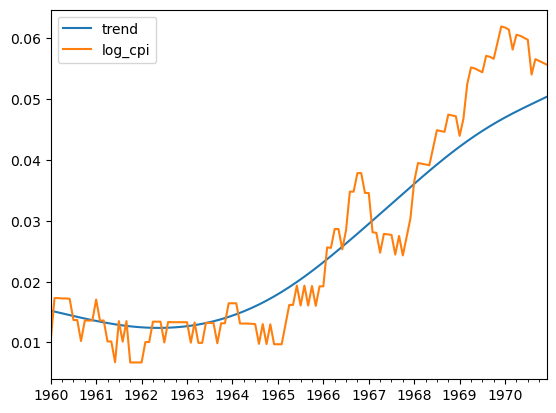

In [40]:
cpi_decomp_pct_change["1960":"1970"].plot()

In [41]:
model.seasonal[-12:]

2023-02-01    0.997315
2023-03-01    0.997687
2023-04-01    0.999014
2023-05-01    0.999400
2023-06-01    1.000685
2023-07-01    1.001668
2023-08-01    1.001362
2023-09-01    1.002383
2023-10-01    1.002151
2023-11-01    1.001097
2023-12-01    0.998902
2024-01-01    0.998335
Name: seasonal, dtype: float64

In [42]:
dat.cpi[-1]

308.417

In [43]:
model.trend

1913-01-01      9.817954
1913-02-01      9.829375
1913-03-01      9.840797
1913-04-01      9.852219
1913-05-01      9.863641
                 ...    
2023-09-01    307.528832
2023-10-01    308.484192
2023-11-01    309.439552
2023-12-01    310.394912
2024-01-01    311.350273
Name: trend, Length: 1333, dtype: float64

In [44]:
mod = sm.tsa.arima.ARIMA(dat.cpi, order=(1, 1, 1))
res = mod.fit()
print(res.summary())

c:\Users\jon_r\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jon_r\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jon_r\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    cpi   No. Observations:                 1333
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -681.808
Date:                Thu, 15 Feb 2024   AIC                           1369.616
Time:                        20:18:00   BIC                           1385.199
Sample:                    01-01-1913   HQIC                          1375.456
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6008      0.013     47.725      0.000       0.576       0.625
ma.L1          0.1209      0.018      6.643      0.000       0.085       0.157
sigma2         0.1629      0.003     63.835      0.0

In [45]:
res.forecast(steps = 12)

2024-02-01    309.643156
2024-03-01    310.379788
2024-04-01    310.822332
2024-05-01    311.088198
2024-06-01    311.247921
2024-07-01    311.343877
2024-08-01    311.401524
2024-09-01    311.436156
2024-10-01    311.456962
2024-11-01    311.469462
2024-12-01    311.476971
2025-01-01    311.481482
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
dat.cpi[-13:]


2020-11-01    260.927
2020-12-01    261.560
2021-01-01    262.231
2021-02-01    263.161
2021-03-01    264.793
2021-04-01    266.832
2021-05-01    268.551
2021-06-01    270.981
2021-07-01    272.265
2021-08-01    273.012
2021-09-01    274.138
2021-10-01    276.724
2021-11-01    278.880
Name: cpi, dtype: float64

In [ ]:
model.trend[-13:]


2020-11-01    261.459042
2020-12-01    262.571542
2021-01-01    263.729917
2021-02-01    264.877875
2021-03-01    266.031167
2021-04-01    267.290792
2021-05-01    268.704125
2021-06-01    268.012470
2021-07-01    268.841798
2021-08-01    269.671126
2021-09-01    270.500454
2021-10-01    271.329782
2021-11-01    272.159110
Name: trend, dtype: float64

In [ ]:
model.seasonal[-12:]

2020-12-01    0.999051
2021-01-01    0.998384
2021-02-01    0.997229
2021-03-01    0.997543
2021-04-01    0.998881
2021-05-01    0.999228
2021-06-01    1.000531
2021-07-01    1.001613
2021-08-01    1.001383
2021-09-01    1.002482
2021-10-01    1.002312
2021-11-01    1.001363
Name: seasonal, dtype: float64